# Extract reference conncectivity matrices of the mouse visual system from various papers

In [1]:
from itertools import permutations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
areas_list = ['V1', 'RL', 'LM', 'AL', 'PM', 'AM']
areas_map = {'VISp':'V1', 'VISl':'LM', 'VISrl':'RL', 'VISal':'AL', 'VISpm':'PM', 'VISam':'AM', 'LGd':'LGN', 'LP':'LP'}
inverse_areas_map = {v: k for k, v in areas_map.items()}
areas_index = [0, 1, 2, 3, 4, 5]

index_combinations = list(permutations(areas_index, 2))
print('there are ',len(index_combinations), 'combinations of areas where we are interested in the strength of the connections')

there are  30 combinations of areas where we are interested in the strength of the connections


In [3]:
# quick plotting function used to visualize the connectivity matrices
def plot_connect_matrix(connect_matrix, title):
    plt.imshow(connect_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.xticks(areas_index, areas_list)
    plt.yticks(areas_index, areas_list)
    plt.title(title)
    plt.ylabel('Target area')
    plt.xlabel('Source area')
    plt.show()

## Source 1: *The Mouse Cortical Connectome, Characterized by an Ultra-Dense Cortical Graph, Maintains Specificity by Distinct Connectivity Profiles*
https://doi.org/10.1016/j.neuron.2017.12.037

- Corresponding File: `source_1.xlsx`, taken from the supplementary information section of the online article.
- Connectivity Metric and method: 

In [4]:
tab1 = pd.read_excel('source_1.xlsx')
tab1

,Case,Mouse,Strain,Sex,Age (weeks),Weight (grams),Source area,Target area,Neurons,Total neurons,FLNe
0,1,13286,PVtdT,NaN,9,22.0,A,ACAd,1781,187372,0.009505
1,1,13286,PVtdT,NaN,9,22.0,ACAv,ACAd,31458,187372,0.167900
2,1,13286,PVtdT,NaN,9,22.0,AId,ACAd,2027,187372,0.010820
3,1,13286,PVtdT,NaN,9,22.0,AIp,ACAd,126,187372,0.000673
4,1,13286,PVtdT,NaN,9,22.0,AIv,ACAd,263,187372,0.001404
...,...,...,...,...,...,...,...,...,...,...,...
1237,27,14006,PVtdT,NaN,12,NaN,SSp-un,VISC,4830,268646,0.017980
1238,27,14006,PVtdT,NaN,12,NaN,SSs,VISC,70087,268646,0.260900
1239,27,14006,PVtdT,NaN,12,NaN,TEa,VISC,17414,268646,0.064820
1240,27,14006,PVtdT,NaN,12,NaN,TEp,VISC,186,268646,0.000692


### Processing Method:
search by source area and target area. If multiple entries are found, average the values.

[[0.   0.01 0.27 0.04 0.11 0.01]
 [0.2  0.   0.05 0.07 0.01 0.01]
 [0.48 0.02 0.   0.04 0.03 0.02]
 [0.21 0.09 0.09 0.   0.01 0.02]
 [0.35 0.   0.05 0.01 0.   0.1 ]
 [0.11 0.02 0.02 0.01 0.09 0.  ]]


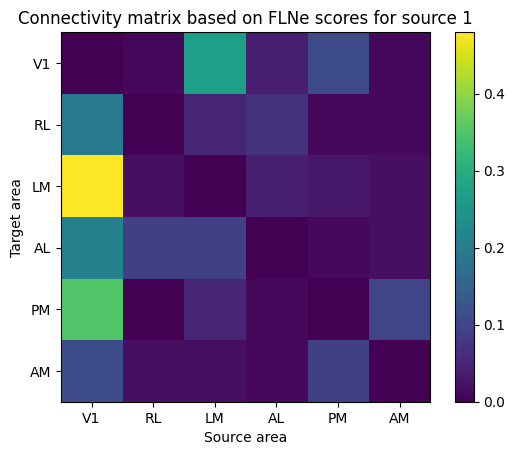

In [5]:
# setup the connectivity matrix for source 1
CM1 = np.zeros((len(areas_list), len(areas_list)))

# read in and store the mean connection strength for each pair of areas
for var_from_idx, var_to_idx in index_combinations:
    var_from = areas_list[var_from_idx]
    var_to = areas_list[var_to_idx]

    mean_conn = tab1[(tab1['Source area'] == var_from) & (tab1['Target area'] == var_to)]['FLNe'].mean()
    
    CM1[var_to_idx, var_from_idx] = mean_conn

CM1 = np.round(CM1, 2)

print(CM1)
plot_connect_matrix(CM1, 'Connectivity matrix based on FLNe scores for source 1')

### Export Matrices

In [7]:
with open('reference_structural_conn_matrix.pkl', 'wb') as f:
    pickle.dump(CM1, f)